# **Word embeddings**
Vectors obtained from converting words into numeric tokens, and sequencing sentences from those tokens last week. We can tuned the vectors using word embeddings, which find the similarily in meaning between words and it will have a similar direction in the vector space.
*  Using either a Flatten layer (`tf.keras.layers.Flatten()`) or a GlobalAveragePooling1D (`tf.keras.layers.GlobalAveragePooling1D()`) layer in text processing are often interchangeable.
    - In fact, `tf.keras.layers.GlobalAveragePooling1D()` may be faster.


`tf.keras.layers.Embedding`:
*   vocab_size = 1000 # how many unique words in the vocabulary?
*   embedding_dim = 16 # this is a tuneable parameter 
*   max_length = 120 #  how long do you want your max sequences to be?
*   trunc_type = 'post' #
*   padding_type = 'post' # 
*   oov_tok = "<OOV>" # 
*   training_portion = .8

https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%202/Course_3_Week_2_Exercise_Question.ipynb

In [ ]:
#Word embeddings
%pip install -q tensorflow-datasets

In [ ]:
#Load imbd data from tensorflow dataset
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJULQD0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJULQD0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJULQD0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
#Vectorized data
import numpy as np
train_data, test_data = imdb['train'], imdb['test']

train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)
print(train_labels_final[:10])
print(train_labels_final.shape, test_labels_final.shape)

[0 0 0 1 1 1 0 0 0 0]
(25000,) (25000,)


In [ ]:
vocab_size = 10000 # how many unique words in the vocabulary?
embedding_dim = 16 # this is a tuneable parameter
max_length = 120 # how long do you want your max sequences to be?
trunc_type='post'
oov_tok = "<OOV>"

#Tokenizing and padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#training
tokenizer = Tokenizer(num_words = vocab_size, 
                      oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,
                       maxlen=max_length,
                       truncating=trunc_type)
#testing
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, 
                           maxlen=max_length)

In [ ]:
#Modeling Building
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#binary crossentropy due to IMDB review are either positive or negative
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit model
history = model.fit(train_padded, train_labels_final, 
          epochs=10, 
          validation_data=(test_padded, test_labels_final))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4893 - accuracy: 0.7446 - val_loss: 0.3461 - val_accuracy: 0.8494
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2419 - accuracy: 0.9078 - val_loss: 0.3711 - val_accuracy: 0.8364
Epoch 3/10
782/782 [==============================] - 4s 4ms/step - loss: 0.0963 - accuracy: 0.9750 - val_loss: 0.4547 - val_accuracy: 0.8254
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0239 - accuracy: 0.9969 - val_loss: 0.5312 - val_accuracy: 0.8269
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 0.5948 - val_accuracy: 0.8258
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.6455 - val_accuracy: 0.8280
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 8.8628e-04 - accuracy: 1.0000 - val_loss: 0.6890 - val_accuracy: 0.8286
Ep

- we can see the overfitting indication. it can be improved with tweaking hyperparameters, such as embedding size and vocab size.

In [ ]:
# Get the size of the embedding layer
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
# outputs the size of the embedding: (vocab_size, embedding_dim)
print("Weight Shape:",weights.shape) #an embedding_dim size vector for each word in the vocab

Weight Shape: (10000, 16)


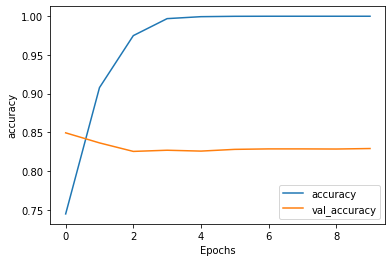

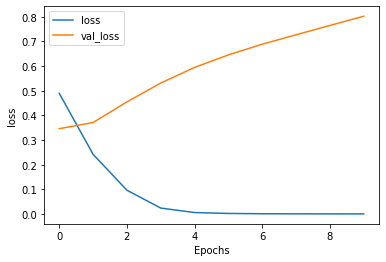

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

100% accuracy on the training set which is a strong indication of overfitting.

When you're working with text data, you might find the validation loss increases as training goes on
- tweak hyperparameters, such as embedding size, vocab size, etc.

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[1]))
print(train_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
#Download file
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1431], [966], [4], [1537], [1537], [4715], [], [790], [2019], [11], [2929], [2184], [], [790], [2019], [11], [579], [], [11], [579], [], [4], [1782], [4], [4517], [11], [2929], [1275], [], [], [2019], [1003], [2929], [966], [579], [790], []]


# **Exercise - Multi Class Text Classification(BBC)**

In [ ]:
#%pip install wget
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-08-05 01:03:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.96.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  23.1MB/s    in 0.2s    

2020-08-05 01:03:08 (23.1 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:

vocab_size = 1000 # how many unique words in the vocabulary? 
embedding_dim = 16 
max_length = 120 #  how long do you want your max sequences to be?
trunc_type = 'post' 
padding_type = 'post' 
oov_tok = "<OOV>" 
training_portion = .8

In [ ]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", 
             "an", "and", "any", "are", "as", "at", "be", "because", "been", 
             "before", "being", "below", "between", "both", "but", "by", 
             "could", "did", "do", "does", "doing", "down", "during", "each", 
             "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [ ]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # skip the first row
    for row in reader:
      labels.append(row[0])
      sentence = row[1]
      for word in stopwords:
        token = " " + word + " "
        sentence = sentence.replace(token, " ") #remove stopwords
        sentence = sentence.replace("  ", " ") #remove whitespace
      sentences.append(sentence)
    
print(len(labels), len(sentences))

2225 2225


In [ ]:
train_size = int(len(sentences) * training_portion)  

train_sentences = sentences[:train_size]  
train_labels = labels[:train_size] 
validation_sentences = sentences[train_size:] 
validation_labels = labels[train_size:] 
  
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
#Tokenizing
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
tokenizer.fit_on_texts(train_sentences) 
word_index = tokenizer.word_index 

#Train
train_sequences = tokenizer.texts_to_sequences(train_sentences) 
train_padded = pad_sequences(train_sequences, 
                            padding= padding_type,# add the padding to the end
                            truncating= trunc_type,# remove words from the end, when it's larger then maxlen
                            maxlen = max_length) # set the maximum length of a sequence (To make all sequences to be the same size)
#Validation
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, 
                                  padding = padding_type, 
                                  maxlen=max_length) 

print("\nSequences =", train_sequences)
print("\nPadded Sequences:\n",train_padded)
print("Train Padded Shape:\n",train_padded.shape)
print(len(validation_sequences))
print("Train Padded Shape:\n",validation_padded.shape)


Sequences = [[99, 170, 1, 1, 55, 993, 771, 1, 97, 1, 1, 139, 186, 1, 1, 1, 1, 48, 9, 907, 99, 4, 1, 347, 93, 24, 17, 140, 1, 1, 1, 585, 465, 1, 65, 1, 1, 1, 10, 935, 4, 745, 12, 858, 1, 11, 613, 1, 1, 408, 4, 1, 1, 746, 55, 552, 1, 1, 1, 144, 262, 123, 1, 809, 1, 994, 599, 12, 1, 1, 935, 1, 139, 357, 186, 1, 1, 1, 45, 69, 1, 34, 11, 2, 1, 22, 2, 1, 146, 429, 9, 153, 1, 79, 1, 449, 1, 99, 1, 85, 1, 90, 1, 60, 1, 99, 8, 1, 614, 97, 1, 99, 1, 141, 147, 433, 11, 1, 44, 56, 162, 1, 97, 1, 1, 5, 13, 9, 449, 1, 1, 13, 8, 1, 1, 444, 1, 1, 1, 586, 1, 1, 1, 782, 11, 552, 1, 1, 144, 1, 413, 859, 1, 1, 40, 1, 1, 1, 1, 1, 257, 11, 1, 90, 747, 8, 1, 1, 162, 735, 606, 1, 134, 34, 1, 1, 445, 4, 91, 947, 125, 24, 17, 22, 1, 1, 43, 1, 2, 1, 29, 43, 95, 348, 1, 43, 25, 481, 268, 1, 1, 341, 1, 312, 747, 1, 22, 1, 1, 1, 307, 772, 4, 1, 408, 1, 400, 444, 1, 3, 1, 1, 1, 1, 75, 1, 1, 1, 262, 1, 1, 13, 1, 408, 47, 892, 21, 259, 1, 358, 60, 562, 413, 3, 1, 1, 670, 1, 214, 99, 1, 99, 98, 48, 9, 333, 408, 85, 90

In [ ]:
#Label Tokenizing
label_tokenizer = Tokenizer()  
label_tokenizer.fit_on_texts(labels) 

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))  
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels)) 

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)


[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(24, activation = 'relu'), 
    tf.keras.layers.Dense(6, activation = 'sigmoid') #6 outputs
    
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 30
history = model.fit(train_padded, training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))     

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
56/56 [==============================] - 0s 4ms/step - loss: 1.7798 - accuracy: 0.2522 - val_loss: 1.7644 - val_accuracy: 0.2382
Epoch 2/30
56/56 [==============================] - 0s 2ms/step - loss: 1.7389 - accuracy: 0.2287 - val_loss

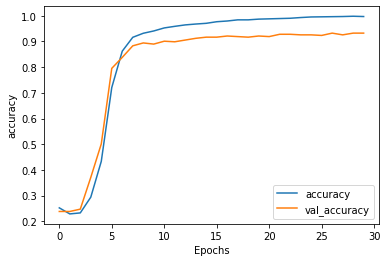

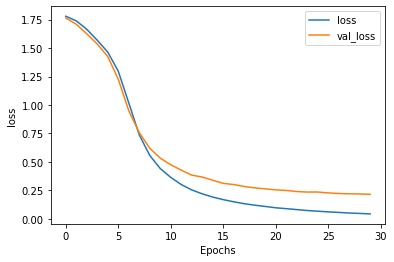

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [ ]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')